In [11]:
import numpy as np
import sys
import ee
ee.Authenticate()
ee.Initialize(project='ee-mendesbrunos2015')

In [2]:
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly
import matplotlib.pyplot as plt
from IPython.display import Image


Usando o código do exemplo 1.1, a ideia do autor é ler uma imagem multiespectral e então mostrar uma banda espectral, usando o nome do arquivo da imagem e o número da banda desejada para fazer o display.

In [3]:
def disp(infile, n):
    '''read a multispectral image
       and display n'th band'''
    gdal.AllRegister()             
    inDataset = gdal.Open(infile, GA_ReadOnly)
    cols = inDataset.RasterXSize 
    rows = inDataset.RasterYSize 
    bands = inDataset.RasterCount
    image = np.zeros((bands, rows, cols))
    for b in range(bands):
        band = inDataset.GetRasterBand(b+1)
        print(f"A imagem {infile} possui {bands} bandas.")
        image[b,:,:] = band.ReadAsArray(0,0,cols,rows)
    inDataset = None
    band = image[n-1, :, :]
    mn = np.amin(band)
    mx = np.amax(band)
    plt.imshow((band-mn)/(mx-mn), cmap='gray')#, vmin=0, vmax=1)
    plt.show()                        

Feito o código, agora vamos mostrar a imagem com a banda 1

c:\Users\bruno\AppData\Local\Programs\Python\Python313\Lib\site-packages\osgeo\gdal.py:314: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.


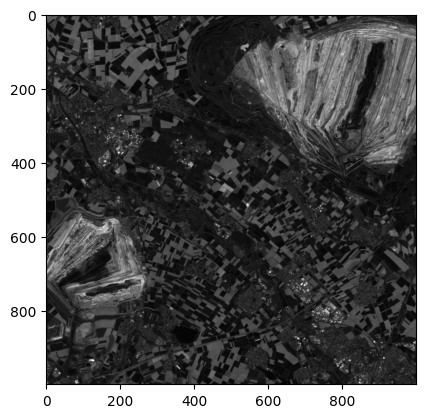

In [4]:
if __name__ == '__main__':
    infile = "C:/Users/bruno/code/crc5imagery/AST_20070501.tif"    
    bandnumber = 1
    disp(infile, bandnumber)

Sabendo que há 9 bandas, agora quero ver na na última banda

A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.
A imagem C:/Users/bruno/code/crc5imagery/AST_20070501.tif possui 9 bandas.


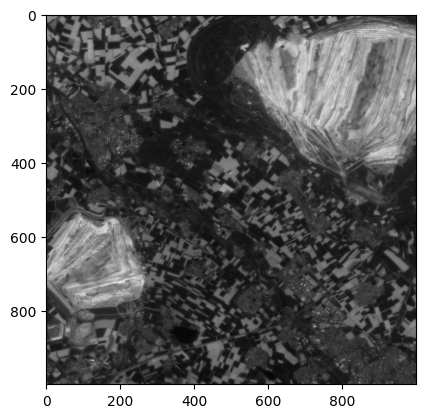

In [5]:
if __name__ == '__main__':
    infile = "C:/Users/bruno/code/crc5imagery/AST_20070501.tif"    
    bandnumber = 9
    disp(infile, bandnumber)

Obtida a imagem em alguma banda e sabendo que há 9 bandas, vou montar um grid contendo todas bandas em uma só imagem.

OBS: Devo pesquisar qual o máximo de bandas que um sensor consegue capturar, já que dependendo do limite, um grid pode não ser a melhor opção para visualizar todas as bandas ao mesmo (se isso for necessário também)

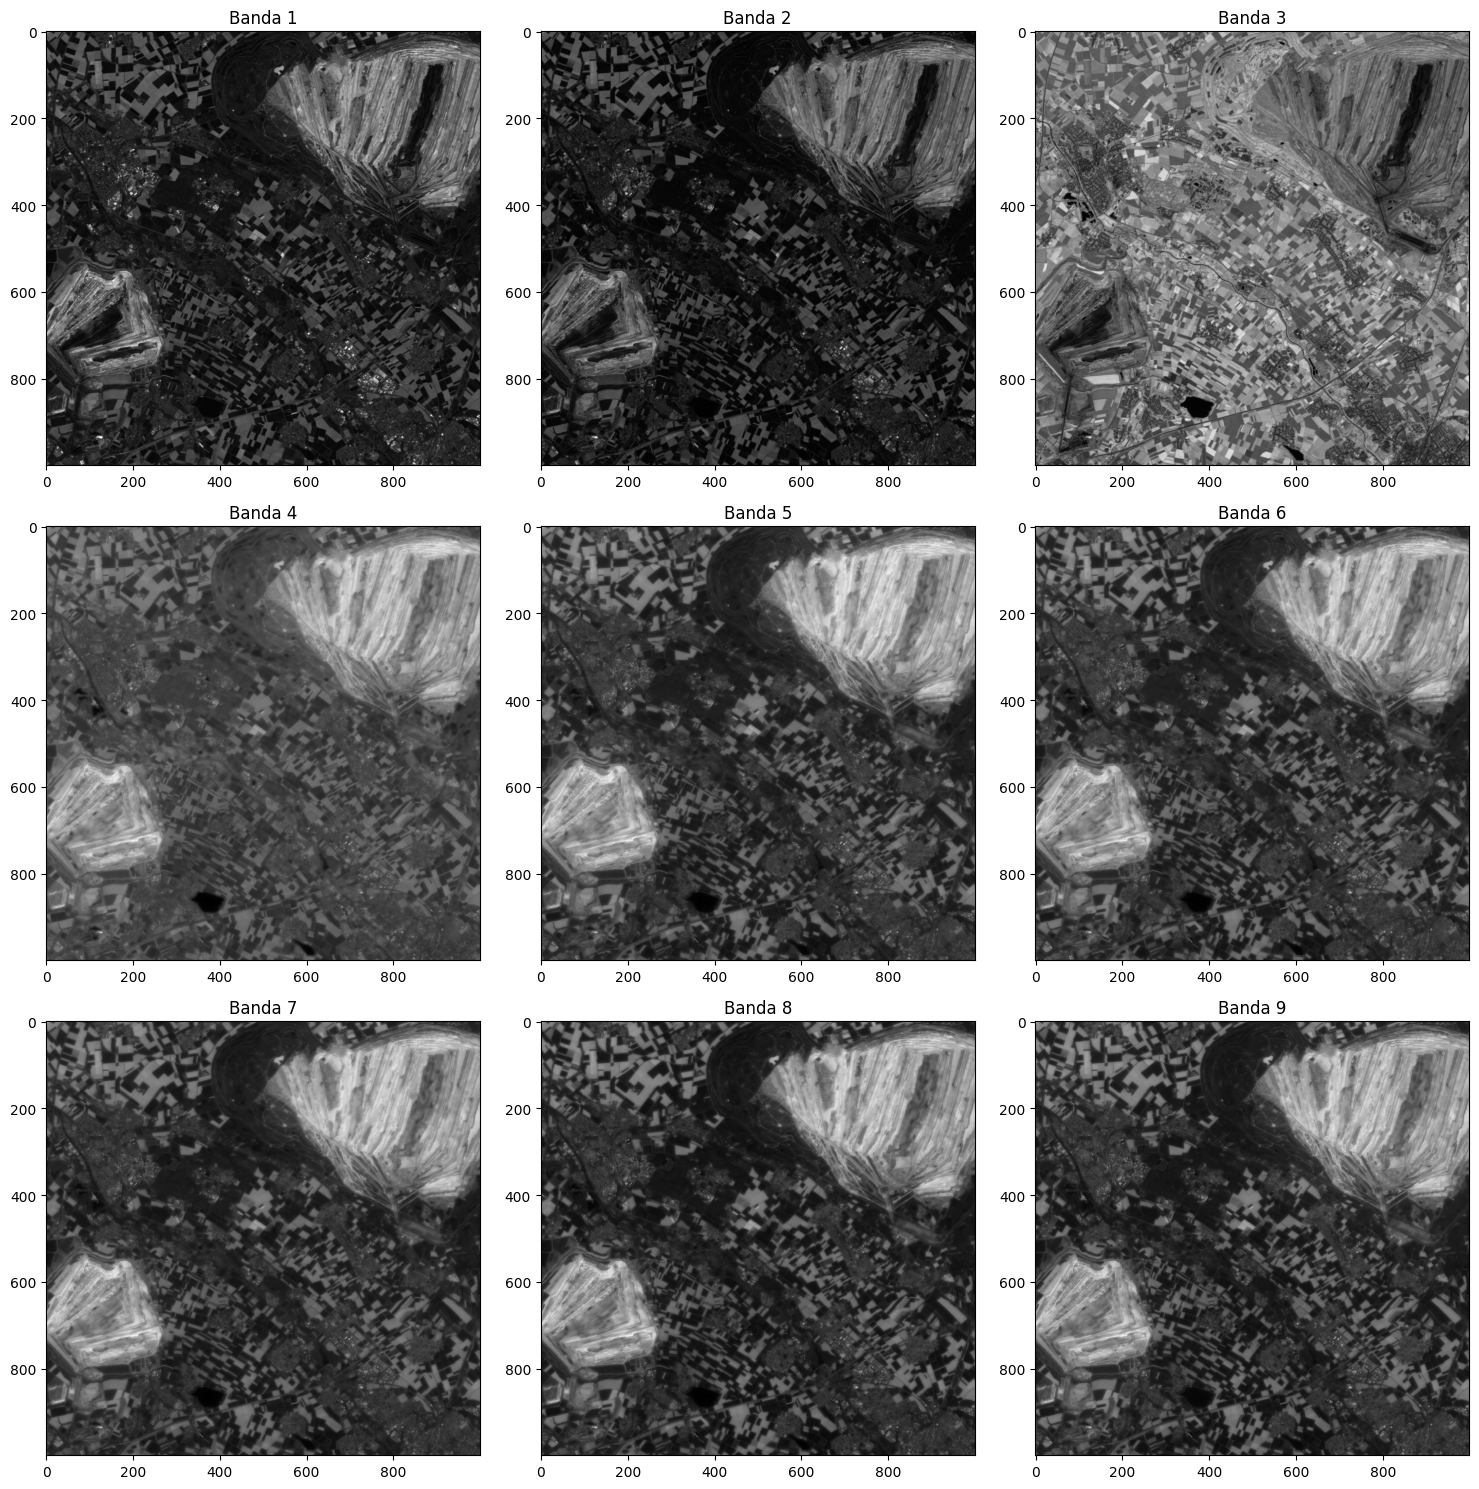

In [6]:
def disp_all_bands_grid(infile):

    gdal.AllRegister()
    inDataset = gdal.Open(infile, GA_ReadOnly)

    # --- Verificação de erro aprimorada ---
    if inDataset is None:
        print(f"Erro: Não foi possível abrir o arquivo {infile}")
        print("Verifique se o caminho está correto e se o arquivo existe e não está corrompido.")
        sys.exit(1) # Sai do script com um código de erro
    # ------------------------------------

    cols = inDataset.RasterXSize
    rows = inDataset.RasterYSize
    bands_count = inDataset.RasterCount # Usando bands_count para não conflitar com a variável 'band' do código anterior

    if bands_count != 9:
        print(f"Erro: Esta imagem possui {bands_count} bandas, mas o script espera 9 bandas para o grid 3x3.")
        sys.exit(1)
    # -----------------------------------------------

    image_data = np.zeros((bands_count, rows, cols))
    for b_idx in range(bands_count):
        band_obj = inDataset.GetRasterBand(b_idx + 1)
        image_data[b_idx, :, :] = band_obj.ReadAsArray(0, 0, cols, rows)

    inDataset = None # Fecha o dataset
    # Não precisamos mais do objeto 'band' do GDAL, apenas dos dados numpy 'image_data'

    # Configuração do grid 3x3
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15)) 
    axes = axes.flatten()

    for i in range(bands_count):
        current_band_data = image_data[i, :, :] # Pega os dados da banda atual (índice i)

        # Normalizando os dados (pesquisar o porque da normalização) 
        mn = np.amin(current_band_data)
        mx = np.amax(current_band_data)
        if (mx - mn) == 0: # Evita divisão por zero se a banda for uniforme
            normalized_band = current_band_data
        else:
            normalized_band = (current_band_data - mn) / (mx - mn)

        axes[i].imshow(normalized_band, cmap='gray')
        axes[i].set_title(f'Banda {i+1}')
        axes[i].axis('on') 

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    infile = "C:/Users/bruno/code/crc5imagery/AST_20070501.tif" 
    disp_all_bands_grid(infile)

Dá para ver como que cada imagem tem um contraste diferente, cada uma então pode ter um propósito diferente; como um possível destaque a uma vegetação ou alguma área ubrana. Algumas bandas parecem ser bem parecidas, mas há algumas pequenas diferenças. As abndas 8 e 9, por exemplo, tem um contraste parecido mas o "morro" é diferente.

Outro ponto: a imagem deve ser 1000x1000. 

-----------------------------------------------------------

Agora fazendo para o RAS

In [ ]:
minlon = -56.20
minlat = -15.70
maxlon = -55.95
maxlat = -15.50

rect = ee.Geometry.Rectangle([minlon,minlat,maxlon,maxlat]) # Define a região de interesse como um retângulo
collection = ee.ImageCollection('COPERNICUS/S1_GRD') \
  .filterBounds(rect) \
  .filterDate(ee.Date('2025-05-01'), ee.Date('2025-06-01')) \
  .filter(ee.Filter.eq('transmitterReceiverPolarisation', 
                                              ['VV','VH'])) \
  .filter(ee.Filter.eq('resolution_meters', 10)) \
  .filter(ee.Filter.eq('instrumentMode', 'IW')) 
    
image = ee.Image(collection.first()).clip(rect)                        
url = image.select('VV').getThumbURL({'min':-20,'max':0})
Image(url=url)

In [ ]:
import requests
minlon = -56.20
minlat = -15.70
maxlon = -55.95
maxlat = -15.50

rect = ee.Geometry.Rectangle([minlon,minlat,maxlon,maxlat])

start_date = ee.Date('2025-05-01')
end_date = ee.Date('2025-06-01')

collection = ee.ImageCollection('COPERNICUS/S1_GRD') \
  .filterBounds(rect) \
  .filterDate(start_date, end_date) \
  .filter(ee.Filter.eq('transmitterReceiverPolarisation',
                                     ['VV','VH'])) \
  .filter(ee.Filter.eq('resolution_meters', 10)) \
  .filter(ee.Filter.eq('instrumentMode', 'IW'))

image = ee.Image(collection.first()).clip(rect)
url = image.select('VV').getThumbURL({'min':-20,'max':0})
output_filename = "cuiaba_sentinel1_2025_VV.png" 
try:
    response = requests.get(url, stream=True)
    response.raise_for_status() 

    with open(output_filename, 'wb') as out_file: 
        for chunk in response.iter_content(chunk_size=8192): 
            out_file.write(chunk) 

    print(f"Imagem salva com sucesso como: {output_filename}")

except requests.exceptions.RequestException as e:
    print(f"Erro ao baixar a imagem: {e}")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Image(url=url)

Imagem salva com sucesso como: cuiaba_sentinel1_2025_VV.png


Por ser uma imagem SAR, cada pixel representa a quantidade de energia que foi retroespalhada de volta para o satélite; logo quanto mais claro mais energia foi refletida. Regiões como solo úmido ou vegetação com alta umidade ou solo úmido, influencia na quantidade de energia que volta para o satélite.

O código fornecido pelo livro faz um filtro para buscar imagens com a polarização VV e VH, depois seleciona a polarização VV para mostrar a imagem.

In [ ]:
import requests

minlon = -56.20
minlat = -15.70
maxlon = -55.95
maxlat = -15.50

rect = ee.Geometry.Rectangle([minlon,minlat,maxlon,maxlat])

start_date = ee.Date('2025-05-01')
end_date = ee.Date('2025-06-01')

collection = ee.ImageCollection('COPERNICUS/S1_GRD') \
  .filterBounds(rect) \
  .filterDate(start_date, end_date) \
  .filter(ee.Filter.eq('transmitterReceiverPolarisation',
                                     ['VV','VH'])) \
  .filter(ee.Filter.eq('resolution_meters', 10)) \
  .filter(ee.Filter.eq('instrumentMode', 'IW'))

image = ee.Image(collection.first()).clip(rect)
url = image.select('VH').getThumbURL({'min':-20,'max':0})

output_filename = "cuiaba_sentinel1_2025_VH.png"

try:
    response = requests.get(url, stream=True) 
    response.raise_for_status() 

    with open(output_filename, 'wb') as out_file: # Abre o arquivo em modo de escrita binária
        for chunk in response.iter_content(chunk_size=8192): # Itera sobre o conteúdo em pedaços
            out_file.write(chunk) # Escreve os pedaços no arquivo

    print(f"Imagem salva com sucesso como: {output_filename}")

except requests.exceptions.RequestException as e:
    print(f"Erro ao baixar a imagem: {e}")
except Exception as e:
    print(f"Ocorreu um erro: {e}")
# ----------------------------------
Image(url=url)

Imagem salva com sucesso como: cuiaba_sentinel1_2025_VH.png


----------------------------------------------------------------

# Matrizes

Agora vamos para a parte algébrica. Primeiro vamos definir tres matrizes: dois 1x1, uma vertical e outra horizontal, e outra 2x2. A partir delas,  vamos trabalhar com as propriedas básicas de operação: adição, subtração e multiplicação.

In [15]:
x = np.asmatrix([[1],[2]])
y = np.asmatrix([[1,2],[3,4]])
z = np.asmatrix([[1,2]])
w = np.asmatrix([[1],[2]])

In [16]:
print(x)
print(y)
print(z)
print(w)

[[1]
 [2]]
[[1 2]
 [3 4]]
[[1 2]]
[[1]
 [2]]


In [17]:
print(x+w)

[[2]
 [4]]


In [18]:
print(x-w)

[[0]
 [0]]


In [19]:
print(x*z)

[[1 2]
 [2 4]]


Caso queremos saber o comprimento do vetor, temos que fazer a norma do vetor, que é a raiz quadrada da soma dos quadrados das componentes, logo

In [20]:
norma_X = np.sqrt(np.sum(np.square(x)))
print(norma_X)

2.23606797749979


Agora usando a matriz y e outra matriz 2x2, podemos fazer a multiplicação de duas matrizes

In [21]:
b = np.asmatrix([[1,2],[3,4]])
print(y*b)

[[ 7 10]
 [15 22]]


A multiplicação de matrizes só é possível qunado há o mesmo número de colunas em uma matriz é igual a de linhas na outra matriz.

A multiplicação de matrizes não é comutativa, mas é associativa.

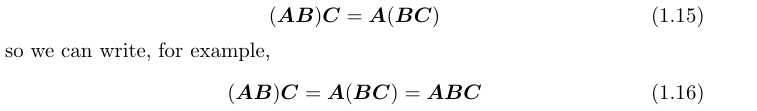

In [22]:
print(y)

[[1 2]
 [3 4]]


Agora, vamos determinar o determinante de uma matriz

In [23]:
print(np.linalg.det(y))

-2.0000000000000004


Agora, podemos encontrar a matriz inversa multiplicando pela matrz identidade

In [24]:
print(y.I)

[[-2.   1. ]
 [ 1.5 -0.5]]


E com isso, podemos encontrar a matriz identidade

In [25]:
print((y.I)*y)

[[1.00000000e+00 0.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]


# MATRIZ COVARIANTE

In [26]:
gdal.AllRegister()
infile = "C:/Users/bruno/code/crc5imagery/AST_20070501.tif"                 
inDataset = gdal.Open(infile,GA_ReadOnly)     
cols = inDataset.RasterXSize
rows = inDataset.RasterYSize    

#  data matrix
G = np.zeros((rows*cols,3))                                   
for b in range(3):
    band = inDataset.GetRasterBand(b+1)
    tmp = band.ReadAsArray(0,0,cols,rows).ravel()
    G[:,b] = tmp - np.mean(tmp)
    
#  covariance matrix
C = np.asmatrix(G).T*np.asmatrix(G)/(cols*rows-1)  
C

matrix([[ 407.13229638,  442.18038332,  -78.32374081],
        [ 442.18038332,  493.57036035, -120.64197611],
        [ -78.32374081, -120.64197611,  438.95704379]])

# Autovalores e Autovetores

Serve realizar transformações de dados que revelam informações importantes, como a variabilidade dos dados ou para reduzir a dimensionalidade de forma eficiente.

In [27]:
eigenvalues, eigenvectors = np.linalg.eigh(C)

In [28]:
print(eigenvalues)


[  4.77425692 399.58595158 935.29949202]


In [29]:
print(eigenvectors)

[[-0.73352328  0.22653637 -0.64080018]
 [ 0.67736254  0.16613156 -0.71664516]
 [ 0.05588906  0.95972995  0.27530862]]


In [30]:
U = eigenvectors
print(U.T*U)

[[ 1.00000000e+00  4.87066695e-17 -4.93847135e-17]
 [ 4.87066695e-17  1.00000000e+00  7.51452836e-17]
 [-4.93847135e-17  7.51452836e-17  1.00000000e+00]]


# Singular value decomposition

In [31]:
b = np.asmatrix([1,2,3])
# an almost singular matrix
A = b.T*b + np.random.rand(3,3)*0.001
# a symmetric almost singular matrix
A = A + A.T
print('determinant: %f'%np.linalg.det(A))
# singular value decomposition
U,Lambda,V = np.linalg.svd(A)
print('Lambda = %s'%str(Lambda))
print('U = %s'%str(U))
print('V = %s'%str(V))

determinant: -0.000001
Lambda = [2.80030360e+01 6.60937228e-04 6.28039550e-05]
U = [[-0.26730261 -0.19315241 -0.94405586]
 [-0.53453142 -0.78543168  0.31204685]
 [-0.80176398  0.58803846  0.1067019 ]]
V = [[-0.26730261 -0.53453142 -0.80176398]
 [-0.19315241 -0.78543168  0.58803846]
 [ 0.94405586 -0.31204685 -0.1067019 ]]


# Minima n Maxima